# **PLAYERS IMPROVEMENT PREDICTION**

In [ ]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [ ]:
#importing players data acquired from kaggle to a dataframe
data="/content/players_data.csv"
df=pd.read_csv(data)
df

,Year,Player,Pos,Age,Tm,G,TS%,3PAr,FTr,TRB%,...,WS/48,3P%,FT%,Pick,GS%,FGA/48,3PA/48,FTA/48,PF/48,MPG
0,1980.0,Abdul Jeelani,SF,25.0,POR,77.0,0.563,0.011,0.361,11.5,...,0.141,0.050,0.789,61.0,0.345292,21.088647,0.223950,7.614308,5.785381,16.701299
1,1980.0,Adrian Dantley,SF,23.0,UTA,68.0,0.635,0.002,0.415,11.3,...,0.189,0.050,0.842,6.0,0.812997,22.743455,0.035901,9.442034,3.787584,39.323529
2,1980.0,Alex English,SF,26.0,IND,78.0,0.536,0.005,0.239,13.1,...,0.105,0.050,0.789,23.0,0.636405,22.250729,0.119950,5.317784,4.118284,30.782051
3,1980.0,Allan Bristow,SF,28.0,UTA,82.0,0.534,0.009,0.310,13.0,...,0.091,0.050,0.811,21.0,0.580905,16.354167,0.145833,5.062500,4.395833,28.097561
4,1980.0,Allen Leavell,PG,22.0,HOU,77.0,0.560,0.029,0.337,4.8,...,0.091,0.158,0.814,61.0,0.570027,14.831842,0.429581,4.996703,4.454074,27.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13373,2018.0,Yogi Ferrell,SG,24.0,DAL,82.0,0.540,0.492,0.141,6.1,...,0.064,0.373,0.796,61.0,0.256098,15.354952,7.551271,2.166521,3.218230,27.829268
13374,2018.0,Zach Collins,C,20.0,POR,66.0,0.475,0.391,0.145,11.5,...,0.030,0.310,0.643,10.0,0.015152,13.274641,5.190431,1.929187,6.109091,15.833333
13375,2018.0,Zach LaVine,SG,22.0,CHI,24.0,0.499,0.346,0.301,7.7,...,0.025,0.341,0.813,13.0,1.000000,25.975610,9.000000,7.829268,4.024390,27.333333
13376,2018.0,Zach Randolph,PF,36.0,SAC,59.0,0.529,0.193,0.140,15.0,...,0.048,0.347,0.785,19.0,0.966102,24.286472,4.679045,3.405836,3.787798,25.559322


This data consists of following columns :-

*Year - Year*  
Player - Player Name 
Pos - Player's Position 
Age - Age  
Tm - Team  
G - Games 

TS% - True Shooting  
3PAr - 3-Point Attempt Rate

FTr - Free Throw Rate   
TRB% - Total Rebound Percentage     
AST% - Assist Percentage   
STL% - Steal Percentage    
BLK% - Block Percentage    
TOV% - Turnover Percentage    
USG% - Usage Percentage    
*WS - Win Shares*      
WS/48 - Win Shares Per 48 Minutes   
3P% - 3-Point Field Goal Percentage     
FT% - Free Throws    
Pick - Picks    
GS% - Games started Percentage     
FGA/48 - Field Goal Attempts Per 48 Minutes  
3PA/48 - 3-Point Attempt Per 48 Minutes  
FTA/48 - Free Throw Attempts Per 48 Minutes  
PF/48 - Personal Fouls Per 48 Minutes     
*MPG - Minutes Played Per Game*    

In [ ]:
#checking and verifying datatypes of each column values
df.dtypes

Year      float64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
TS%       float64
3PAr      float64
FTr       float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
WS        float64
WS/48     float64
3P%       float64
FT%       float64
Pick      float64
GS%       float64
FGA/48    float64
3PA/48    float64
FTA/48    float64
PF/48     float64
MPG       float64
dtype: object

In [ ]:
#checking for null values in each column
df.isna().sum()

Year      0
Player    0
Pos       0
Age       0
Tm        0
G         0
TS%       0
3PAr      0
FTr       0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
WS        0
WS/48     0
3P%       0
FT%       0
Pick      0
GS%       0
FGA/48    0
3PA/48    0
FTA/48    0
PF/48     0
MPG       0
dtype: int64

### **Calculating Improvement**
We calculate improvement of each player in the following season by subtracting their win share in particular year from the win share in the next year, using formula

Improvement(year) = WS(year+1) - WS(year)

In [ ]:
#calculating improvement
def calculate_improvement(df, column):
    diff = dict()
    for index, row in df.iterrows():
        year = row['Year']
        if year+1 in df['Year'].values:
            diff[year] = float(df.loc[df['Year']==year+1, column] - row[column])
        else:
            diff[year] = np.nan
    return pd.Series(diff)

improvement = df.groupby('Player').apply(calculate_improvement, column='WS')
improvement = pd.DataFrame(improvement).reset_index()
improvement.columns = ['Player', 'Year', 'Improvement']

In [ ]:
improvement

,Player,Year,Improvement
0,A.C. Green,1986.0,4.3
1,A.C. Green,1987.0,0.3
2,A.C. Green,1988.0,1.5
3,A.C. Green,1989.0,-1.7
4,A.C. Green,1990.0,-1.6
...,...,...,...
13373,Zydrunas Ilgauskas,2007.0,-0.5
13374,Zydrunas Ilgauskas,2008.0,-0.5
13375,Zydrunas Ilgauskas,2009.0,-3.1
13376,Zydrunas Ilgauskas,2010.0,0.4


In [ ]:
#checking for null values in improvement dataframe
improvement.isna().sum()

Player            0
Year              0
Improvement    2920
dtype: int64

In [ ]:
#dropping null values
improvement.dropna(inplace=True)

In [ ]:
#merging the calucated improvement into our original dataframe
df = pd.merge(df, improvement, on=['Player', 'Year'], how='inner')
df

,Year,Player,Pos,Age,Tm,G,TS%,3PAr,FTr,TRB%,...,3P%,FT%,Pick,GS%,FGA/48,3PA/48,FTA/48,PF/48,MPG,Improvement
0,1980.0,Abdul Jeelani,SF,25.0,POR,77.0,0.563,0.011,0.361,11.5,...,0.050,0.789,61.0,0.345292,21.088647,0.223950,7.614308,5.785381,16.701299,-2.2
1,1980.0,Adrian Dantley,SF,23.0,UTA,68.0,0.635,0.002,0.415,11.3,...,0.050,0.842,6.0,0.812997,22.743455,0.035901,9.442034,3.787584,39.323529,3.1
2,1980.0,Alex English,SF,26.0,IND,78.0,0.536,0.005,0.239,13.1,...,0.050,0.789,23.0,0.636405,22.250729,0.119950,5.317784,4.118284,30.782051,3.0
3,1980.0,Allan Bristow,SF,28.0,UTA,82.0,0.534,0.009,0.310,13.0,...,0.050,0.811,21.0,0.580905,16.354167,0.145833,5.062500,4.395833,28.097561,-1.7
4,1980.0,Allen Leavell,PG,22.0,HOU,77.0,0.560,0.029,0.337,4.8,...,0.158,0.814,61.0,0.570027,14.831842,0.429581,4.996703,4.454074,27.571429,-2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453,2017.0,Wilson Chandler,SF,29.0,DEN,71.0,0.545,0.347,0.207,11.5,...,0.337,0.727,23.0,0.464789,20.515248,7.122440,4.238507,3.757852,30.943662,-0.3
10454,2017.0,Yogi Ferrell,PG,23.0,DAL,46.0,0.533,0.447,0.226,5.3,...,0.386,0.831,61.0,0.630435,15.799499,7.057644,3.568922,3.609023,26.021739,1.2
10455,2017.0,Zach LaVine,SG,21.0,MIN,47.0,0.576,0.437,0.197,5.3,...,0.387,0.836,13.0,1.000000,19.485420,8.507719,3.842196,2.854202,37.212766,-2.7
10456,2017.0,Zach Randolph,PF,35.0,MEM,73.0,0.490,0.098,0.200,19.1,...,0.223,0.731,19.0,0.068493,25.908175,2.526316,5.187010,3.655095,24.465753,-1.7


# **VISUALIZING IMPROVEMENT**

> Indented block



In [ ]:
#checking number of players played in each year
df.groupby('Year').size()

Year
1980.0    192
1981.0    206
1982.0    204
1983.0    214
1984.0    217
1985.0    215
1986.0    207
1987.0    223
1988.0    223
1989.0    237
1990.0    242
1991.0    260
1992.0    257
1993.0    251
1994.0    259
1995.0    266
1996.0    279
1997.0    282
1998.0    280
1999.0    292
2000.0    296
2001.0    290
2002.0    289
2003.0    288
2004.0    305
2005.0    317
2006.0    319
2007.0    320
2008.0    308
2009.0    312
2010.0    323
2011.0    320
2012.0    319
2013.0    325
2014.0    337
2015.0    339
2016.0    326
2017.0    319
dtype: int64

## **a) Based on Age**

In [ ]:
df["Age"].describe()

count    10458.000000
mean        26.561771
std          3.869644
min         18.000000
25%         24.000000
50%         26.000000
75%         29.000000
max         42.000000
Name: Age, dtype: float64

In [ ]:
#classifying players based on age
#Young-Players aged less than 25 years
young = df.loc[df['Age']<25, 'Improvement']
#Experienced-Players aged between 25 to 30
experienced = df.loc[(df['Age']>=25) & (df['Age']<30), 'Improvement']
#Veteran-Players aged between 30 to 35
veteran = df.loc[(df['Age']>=30) & (df['Age']<35), 'Improvement']
#Old-Players aged more than 35 years
old = df.loc[df['Age']>=35, 'Improvement']
age_data = [young, experienced, veteran, old]

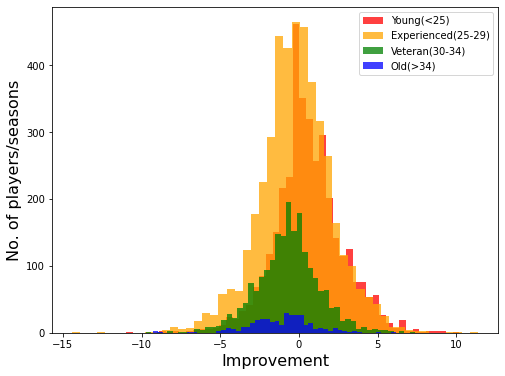

In [ ]:
#Plotting histogram between players based on their age and their improvement
labels = ['Young(<25)', 'Experienced(25-29)', 'Veteran(30-34)', 'Old(>34)']
colors = ['red', 'orange', 'green', 'blue']
plt.figure(figsize=(8,6))
for i in range(len(age_data)):
  plt.hist(age_data[i], bins=50, alpha=0.75, label=labels[i], color=colors[i])
plt.xlabel('Improvement', fontsize=16)
plt.ylabel('No. of players/seasons', fontsize=16)
plt.legend(fontsize=10)
plt.show()

In [ ]:
#calculating ANOVA score
for i in range(len(age_data)-1):
  F_val, P_val = stats.f_oneway(age_data[i],age_data[i+1])
  print("For {} vs {}, F-test score is {} and P-value is {}".format(labels[i],labels[i+1],F_val,P_val))

For Young(<25) vs Experienced(25-29), F-test score is 246.41392359131527 and P-value is 1.0034286557460097e-54
For Experienced(25-29) vs Veteran(30-34), F-test score is 69.05419036846365 and P-value is 1.1563454331351405e-16
For Veteran(30-34) vs Old(>34), F-test score is 9.647999480416058 and P-value is 0.0019180754765218769


It shows that younger players tend to show more improvement than older players. 
However, the differences between means of age groups were statistically significant but are small. Also the variance of improvement in players of the same age were very large. So age alone is not going to be enough for a strong model


## **b) Based on Player type**

In [ ]:
#displaying statistical info of "WS/48" column type
df["WS/48"].describe()

count    10458.000000
mean         0.093764
std          0.054563
min         -0.163000
25%          0.060000
50%          0.093000
75%          0.126000
max          0.325000
Name: WS/48, dtype: float64

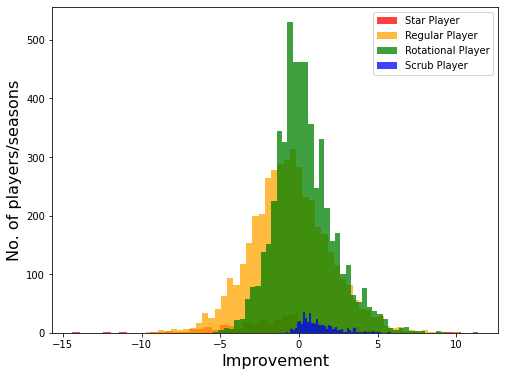

In [ ]:
#classifying players based on their win shares per 48 mins
#Star Player-Players having win share more than 0.2
star_player=df.loc[df["WS/48"]>0.2,"Improvement"]
#Regular Player-Players having win share between 0.1 to 0.2
regular_player=df.loc[(df["WS/48"]>0.1)&(df["WS/48"]<=0.2), "Improvement"]
#Roational Player-Players having win share between 0 to 0.1
rotational_player=df.loc[(df["WS/48"]>0)&(df["WS/48"]<=0.1),"Improvement"]
#Scrub Player-Players having win share less than 0
scrub_player=df.loc[df["WS/48"]<0,"Improvement"]
win_data=[star_player,regular_player,rotational_player,scrub_player]
labels=["Star Player","Regular Player","Rotational Player","Scrub Player"]
colors = ['red', 'orange', 'green', 'blue']
#Plotting histogram between players based on their Win share and their improvement
plt.figure(figsize=(8,6))
for i in range(len(win_data)):
  plt.hist(win_data[i], bins=50, alpha=0.75, label=labels[i], color=colors[i])
plt.xlabel('Improvement', fontsize=16)
plt.ylabel('No. of players/seasons', fontsize=16)
plt.legend(fontsize=10)
plt.show()

In [ ]:
#calculating ANOVA score
for i in range(len(win_data)-1):
  F_val, P_val = stats.f_oneway(win_data[i],win_data[i+1])
  print("For {} vs {}, F-test score is {} and P-value is {}".format(labels[i],labels[i+1],F_val,P_val))

For Star Player vs Regular Player, F-test score is 23.031472219835543 and P-value is 1.6443455403773137e-06
For Regular Player vs Rotational Player, F-test score is 431.81512107034376 and P-value is 7.112912142721697e-94
For Rotational Player vs Scrub Player, F-test score is 99.55445448311008 and P-value is 2.925559680259893e-23


Based on this visualization, we see that bad players (scrub, rotation) tend to improve better than good players(star, regular). But such cases are less as the probability of bad players getting picked in next seasons are very less.

## **c) Based on Games Played**

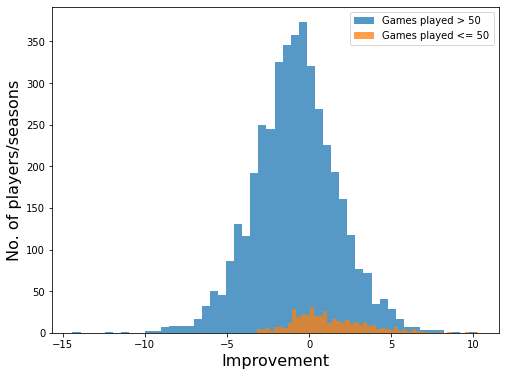

In [ ]:
#classifying players based on their number of games played
#more played-Players who played games more than 50
more_played=df.loc[(df["G"]>50) & (df["WS/48"]>0.1) ,"Improvement"]
#less played-Players who played games less than 50
less_played=df.loc[(df["G"]<=50) & (df["WS/48"]>0.1) , "Improvement"]
#Plotting histogram between players based on their games played and their improvement
plt.figure(figsize=(8,6))
plt.hist(more_played, bins=50, alpha=0.75, label="Games played > 50")
plt.hist(less_played, bins=50, alpha=0.75, label="Games played <= 50")
plt.xlabel('Improvement', fontsize=16)
plt.ylabel('No. of players/seasons', fontsize=16)
plt.legend(fontsize=10)
plt.show()

In [ ]:
#calculating ANOVA score
F_val, P_val = stats.f_oneway(more_played,less_played)
print("For {} vs {}, F-test score is {} and P-value is {}".format("Games played > 50","Games played <= 50",F_val,P_val))

For Games played > 50 vs Games played <= 50, F-test score is 245.2863549446787 and P-value is 6.740226826213417e-54


GThe differences between those who played more and those who played less were statistically significant. Good players who play less matches show better improvement in further seasons when compared to those who play more matches. 

## **d) Based on Previous Year Improvement**

In [ ]:
#calculating improvements of previous year
improvement.columns = ['Player', 'Year', 'Imprv_prev_year']
improvement['Year'] += 1
df= pd.merge(df, improvement, on=['Player', 'Year'], how='left')
df

,Year,Player,Pos,Age,Tm,G,TS%,3PAr,FTr,TRB%,...,FT%,Pick,GS%,FGA/48,3PA/48,FTA/48,PF/48,MPG,Improvement,Imprv_prev_year
0,1980.0,Abdul Jeelani,SF,25.0,POR,77.0,0.563,0.011,0.361,11.5,...,0.789,61.0,0.345292,21.088647,0.223950,7.614308,5.785381,16.701299,-2.2,NaN
1,1980.0,Adrian Dantley,SF,23.0,UTA,68.0,0.635,0.002,0.415,11.3,...,0.842,6.0,0.812997,22.743455,0.035901,9.442034,3.787584,39.323529,3.1,NaN
2,1980.0,Alex English,SF,26.0,IND,78.0,0.536,0.005,0.239,13.1,...,0.789,23.0,0.636405,22.250729,0.119950,5.317784,4.118284,30.782051,3.0,NaN
3,1980.0,Allan Bristow,SF,28.0,UTA,82.0,0.534,0.009,0.310,13.0,...,0.811,21.0,0.580905,16.354167,0.145833,5.062500,4.395833,28.097561,-1.7,NaN
4,1980.0,Allen Leavell,PG,22.0,HOU,77.0,0.560,0.029,0.337,4.8,...,0.814,61.0,0.570027,14.831842,0.429581,4.996703,4.454074,27.571429,-2.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453,2017.0,Wilson Chandler,SF,29.0,DEN,71.0,0.545,0.347,0.207,11.5,...,0.727,23.0,0.464789,20.515248,7.122440,4.238507,3.757852,30.943662,-0.3,NaN
10454,2017.0,Yogi Ferrell,PG,23.0,DAL,46.0,0.533,0.447,0.226,5.3,...,0.831,61.0,0.630435,15.799499,7.057644,3.568922,3.609023,26.021739,1.2,NaN
10455,2017.0,Zach LaVine,SG,21.0,MIN,47.0,0.576,0.437,0.197,5.3,...,0.836,13.0,1.000000,19.485420,8.507719,3.842196,2.854202,37.212766,-2.7,0.4
10456,2017.0,Zach Randolph,PF,35.0,MEM,73.0,0.490,0.098,0.200,19.1,...,0.731,19.0,0.068493,25.908175,2.526316,5.187010,3.655095,24.465753,-1.7,-1.1


In [ ]:
#checking null values of newly added columns
df.isna().sum()

Year                  0
Player                0
Pos                   0
Age                   0
Tm                    0
G                     0
TS%                   0
3PAr                  0
FTr                   0
TRB%                  0
AST%                  0
STL%                  0
BLK%                  0
TOV%                  0
USG%                  0
WS                    0
WS/48                 0
3P%                   0
FT%                   0
Pick                  0
GS%                   0
FGA/48                0
3PA/48                0
FTA/48                0
PF/48                 0
MPG                   0
Improvement           0
Imprv_prev_year    2029
dtype: int64

<Figure size 576x576 with 0 Axes>

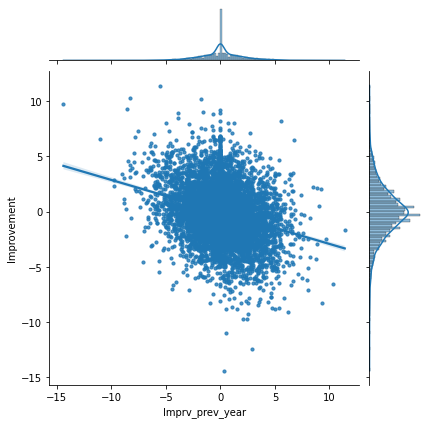

In [ ]:
#plotting scatter plot between their previous year improvement and their current improvement
df.fillna(0,inplace=True)
plt.figure(figsize=(8,8))
sns.jointplot(x='Imprv_prev_year', y='Improvement', data=df, kind='reg', scatter_kws={'s':10})
plt.xlabel('Improvement last year', fontsize=16)
plt.ylabel('Improvement', fontsize=16)
plt.show()

It shows that a players's improvement is more often negatively correlated with his improvement in previous year

In [ ]:
#Calculating correlation between Improvement and other variables in dataframe
df.corr()["Improvement"]

Year              -0.000981
Age               -0.238224
G                 -0.286939
TS%               -0.219079
3PAr              -0.024807
FTr               -0.010910
TRB%              -0.009925
AST%              -0.023916
STL%               0.009947
BLK%               0.022059
TOV%               0.121751
USG%              -0.000674
WS                -0.336901
WS/48             -0.282146
3P%               -0.056580
FT%               -0.090723
Pick              -0.006572
GS%               -0.182506
FGA/48            -0.012434
3PA/48            -0.026075
FTA/48            -0.025650
PF/48              0.104763
MPG               -0.198148
Improvement        1.000000
Imprv_prev_year   -0.270284
Name: Improvement, dtype: float64

Based on visualizations and correlation between variables, we see that factors such as age, games played, minutes played, last season's improvement, etc. that had significant impact on player improvement next season

# **DATA MODELLING**



## **Regression Models**

We initialize dependent and independent variables X, Y. For X, we drop those particular columns that doesn't show much impact on Improvement of the player


Since the most of the values are in percentages, we use MinMaxScaler to scale the values between 0 to 1

In [ ]:
#initializing X and Y
X=df.loc[:, ~df.columns.isin(['Year','Player','Pos', 'Tm','Improvement','WS'])]
Y=df["Improvement"]
#importing MinMaxScaler to scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#splitting the scaled data for training and testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, Y, random_state=0)

### **1. Linear Regression**

In [ ]:
#fitting the training data into our Linear regression model and predicting improvement
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)
ypred = lin_reg.predict(Xtest)
#Calculating root mean squared error value of the model to check the performance of the model
print('RMSE of linear regression model is', np.sqrt(mean_squared_error(ytest, ypred)))

RMSE of linear regression model is 1.9907781948639696


### **2. Ridge Regression**

In [ ]:
#fitting the training data into our Ridge regression model and predicting improvement
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(Xtrain, ytrain)
ypred = ridge_reg.predict(Xtest)
#Calculating root mean squared error value of the model to check the performance of the model
print('RMSE of ridge regression model is', np.sqrt(mean_squared_error(ytest, ypred)))

RMSE of ridge regression model is 1.9907854547591994


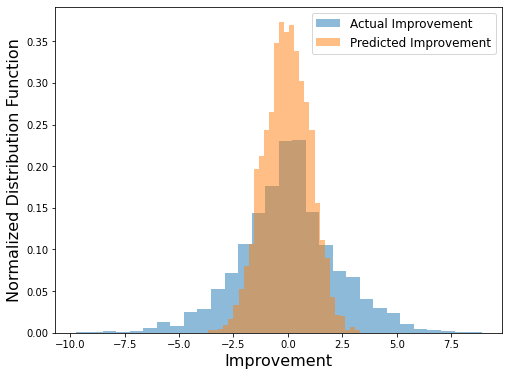

In [ ]:
#plotting cumulative histograms to compare predicted improvement with actual improvement
plt.figure(figsize=(8,6))
plt.hist(ytest, bins=30, alpha=0.5, density=True, label='Actual Improvement')
plt.hist(ypred, bins=30, alpha=0.5, density=True, label='Predicted Improvement')
plt.xlabel('Improvement', fontsize=16)
plt.ylabel('Normalized Distribution Function', fontsize=16)
plt.legend(fontsize=12)

As we see, the predicted improvement is varying a lot from actual improvement.    


This might occur due to the uneven distribution of player improvement because players with little improvement were more common than players with big improvement. Therefore, the models tried to prioritize minimizing errors on players with little improvement when RMSE was used as the evaluation metric

In [ ]:
# #importing MinMaxScaler to scale data
# from sklearn.preprocessing import Normalize
# scaler = PowerTransformer(standardize=False)
# X_scaled1 = scaler.fit_transform(X)
# #fitting the training data into our Ridge regression model and predicting improvement
# #splitting the scaled data for training and testing
# from sklearn.model_selection import train_test_split
# Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled1, Y, random_state=0)
# from sklearn.linear_model import Ridge
# ridge_reg = Ridge(alpha=0.01)
# ridge_reg.fit(Xtrain, ytrain)
# ypred = ridge_reg.predict(Xtest)
# #Calculating root mean squared error value of the model to check the performance of the model
# print('RMSE of ridge regression model is', np.sqrt(mean_squared_error(ytest, ypred)))

In [ ]:
# plt.figure(figsize=(8,6))
# plt.hist(ytest, bins=30, alpha=0.5, density=True, label='Actual Improvement')
# plt.hist(ypred, bins=30, alpha=0.5, density=True, label='Predicted Improvement')
# plt.xlabel('Improvement', fontsize=16)
# plt.ylabel('Normalized Distribution Function', fontsize=16)
# plt.legend(fontsize=12)

Many scalers were tried to scale values in a way that values with larger improvement were given priority.

Hence, we assign weights to values by dividing them with the number of samples with similar target values.

### **Scaling data w.r.t their weights**

In [ ]:
from collections import Counter
def scale_data(x):
    data = x.copy()
    #considering -5 and 5 as outliers
    data[data>5] = 5
    data[data<-5] = -5
    #initialising counter series to store the count of different target values
    n = Counter(np.round(data, 0))
    #calculating weights
    def transform_values(value):
        if value > 5:
            return 1/n[5]
        elif value < -5:
            return 1/n[-5]
        else:
            return 1/n[np.round(value, 0)]
    return np.vectorize(transform_values)(x)
#Scaling weights for training data
ytrain_weights = scale_data(ytrain)
#Scaling weights for testing data
ytest_weights = scale_data(ytest)

In [ ]:
#fitting the re-scaled training data into our Linear regression model and predicting improvement
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain, sample_weight=ytrain_weights)
ypred = lin_reg.predict(Xtest)
#Calculating root mean squared error value of the model to check the performance of the model
lin_score=np.sqrt(mean_squared_error(ytest, ypred,sample_weight=ytest_weights))
print('RMSE of linear regression model is', lin_score)

RMSE of linear regression model is 2.6970224054950336


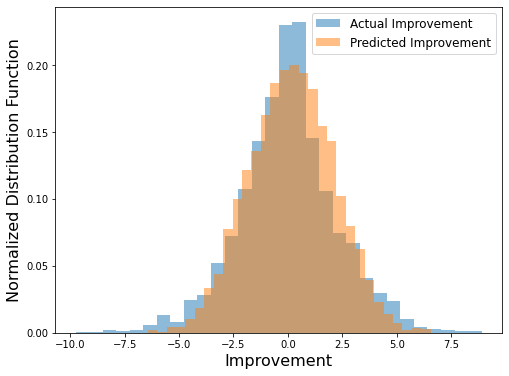

In [ ]:
#plotting cumulative histograms to compare predicted improvement with actual improvement
plt.figure(figsize=(8,6))
plt.hist(ytest, bins=30, alpha=0.5, density=True, label='Actual Improvement')
plt.hist(ypred, bins=30, alpha=0.5, density=True, label='Predicted Improvement')
plt.xlabel('Improvement', fontsize=16)
plt.ylabel('Normalized Distribution Function', fontsize=16)
plt.legend(fontsize=12)

As we see, after assigning weights, the predicted improvement almost matches actual improvement improving accuracy of the models.

In [ ]:
#fitting the re-scaled training data into our Ridge regression model and predicting improvement
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(Xtrain, ytrain, sample_weight=ytrain_weights)
ypred = ridge_reg.predict(Xtest)
ridge_score = np.sqrt(mean_squared_error(ytest, ypred,sample_weight=ytest_weights))
#Calculating root mean squared error value of the model to check the performance of the model
print('RMSE of ridge regression model is',ridge_score)

RMSE of ridge regression model is 2.706235535749749


### **3. SVM**

In [ ]:
#importing svm model and fitting the re-scaled training data into our svm regression model and predicting improvement
from sklearn.svm import SVR
#checking the apt c value for better prediction
for c in [1, 10, 100, 1000, 10000, 1e5]:
  svr = SVR(C=c)
  svr.fit(Xtrain, ytrain, sample_weight=ytrain_weights)
  ypred = svr.predict(Xtest)
  ytest_weights = scale_data(ytest)
  #Calculating root mean squared error value of the model to check the performance of the model
  svr_score=np.sqrt(mean_squared_error(ytest, ypred, sample_weight=ytest_weights))
  if c==100:
    svr_score1=svr_score
  print('The root of weighted squared error of the model with c={} is {}'.format(c,svr_score))

The root of weighted squared error of the model with c=1 is 3.2760512272433298
The root of weighted squared error of the model with c=10 is 2.952261608808606
The root of weighted squared error of the model with c=100 is 2.6804809516475223
The root of weighted squared error of the model with c=1000 is 2.688118341116455
The root of weighted squared error of the model with c=10000 is 2.78322574427244
The root of weighted squared error of the model with c=100000.0 is 3.0434447464056267


### **4. Random Forest**

In [ ]:
#importing random-forest model 
from sklearn.ensemble import RandomForestRegressor
# best_rsme=5
# n_value=0
# m_value=0
# for n in [101, 201, 401, 601,801]:
#     for m in [10, 100, 200, 300]:
#       rf = RandomForestRegressor(random_state=0, n_estimators=n, min_samples_split=m)
#       rf.fit(Xtrain, ytrain, sample_weight=ytrain_weights)
#       ypred = rf.predict(Xtest)
#       rsme=np.sqrt(mean_squared_error(ytest, ypred, sample_weight=ytest_weights))
#       # if rsme<best_rsme:
#         # best_rsme=rsme
#         # n_value=n
#         # m_value=m
#       print("The rsme of this random forest regressor model with n-estimators={} and min_samples_split={} is {}".format(n,m,rsme))

#Initialising and fitting the re-scaled training data into our random-forest regression model and predicting improvement
#parameters are assigned after checking the best values for better prediction
rf = RandomForestRegressor(random_state=2, n_estimators=201, min_samples_split=200)
rf.fit(Xtrain, ytrain, sample_weight=ytrain_weights)
ypred = rf.predict(Xtest)
#Calculating root mean squared error value of the model to check the performance of the model
rf_score=np.sqrt(mean_squared_error(ytest, ypred, sample_weight=ytest_weights))
print('The root of weighted squared error of this Random-forest model is', 
      rf_score)

The root of weighted squared error of this Random-forest model is 2.689723351003631


### **5. Gradient boost regressor**

In [ ]:
#importing Gradient-boost regressor model
from sklearn.ensemble import GradientBoostingRegressor
# best_rsme=5
# n_value=0
# m_value=0
# depth=0
# for d in [2, 3, 5, 10]:
#   for n in [101, 201, 401, 601]:
#     for m in [10, 100, 200]:
#       gb = GradientBoostingRegressor(
#         random_state=42, max_depth=d, max_features='sqrt', min_samples_split=m,
#         learning_rate=0.05, n_estimators=m)
#       gb.fit(Xtrain, ytrain, sample_weight=ytrain_weights)
#       ypred = gb.predict(Xtest)
#       rsme=np.sqrt(mean_squared_error(ytest, ypred, sample_weight=ytest_weights))
#       if rsme<best_rsme:
#         best_rsme=rsme
#         n_value=n
#         m_value=m
#         depth=d
# print('The root of weighted squared error of this model with max_depth={}, learning rate=0.05, min_samples_split={} and n_estimators={} is {}'.format(depth,m_value,n_value,best_rsme))


#Initialising and fitting the re-scaled training data into our Gradient-boost regression model and predicting improvement
#parameters are assigned after checking the best values for better prediction
gb = GradientBoostingRegressor(
        random_state=2, max_depth=2, max_features='sqrt', min_samples_split=200,
        learning_rate=0.05, n_estimators=101
     )
gb.fit(Xtrain, ytrain, sample_weight=ytrain_weights)
ypred = gb.predict(Xtest)
#Calculating root mean squared error value of the model to check the performance of the model
gb_score=np.sqrt(mean_squared_error(ytest, ypred,sample_weight=ytest_weights))
print('The root of weighted squared error of this model is', 
      gb_score)

The root of weighted squared error of this model is 2.7025025454637057


### ***Comparing performance of the models***

In [ ]:
#creating a dataframe to display each model's accuracy
pd.DataFrame({"Linear Regression":lin_score,"Ridge Regression":ridge_score,"SVM Regressor":svr_score1,"Random forest Regression":rf_score,"Gradient boost Regression":gb_score},index=["RSME"])

,Linear Regression,Ridge Regression,SVM Regressor,Random forest Regression,Gradient boost Regression
RSME,2.697022,2.706236,2.680481,2.689723,2.702503


## **Classification Models**

In [ ]:
#Trabsforming target variables to classes
ytrain_class = (ytrain >= 0).astype(int)
ytest_class = (ytest >= 0).astype(int)
ytrain_class

4103    0
9047    1
8684    1
9347    1
9734    1
       ..
9225    1
4859    1
3264    1
9845    0
2732    1
Name: Improvement, Length: 7843, dtype: int64

In [ ]:
# defining a function to indicate best values of the parameters for the models to perform better
from sklearn.model_selection import GridSearchCV
def best_parameter(clf, params, Xtrain, ytrain):
    model = GridSearchCV(clf, params, scoring='neg_log_loss', n_jobs=-1)
    model.fit(Xtrain, ytrain)
    print('Best parameters were', model.best_params_)

### **1. Logistic Regression**

In [ ]:
#importing Logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
params = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
#checking the best values for the required parameters
best_parameter(clf, params, Xtrain, ytrain_class)

Best parameters were {'C': 1, 'penalty': 'l2'}


In [ ]:
#importing required evluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
#initilasing the model with the aquired best parameters and fitting the training data to it
log_reg = LogisticRegression(C=1, penalty='l2')
log_reg.fit(Xtrain, ytrain_class)
#predicitng improvement
ypred = log_reg.predict(Xtest)
#Calculating accuracy score of the model to check the performance of the model
log_reg_score=accuracy_score(ytest_class, ypred)
print('Accuracy of test set was',log_reg_score)

Accuracy of test set was 0.6711281070745698


Confusion Matrix of Logistic regression model :-



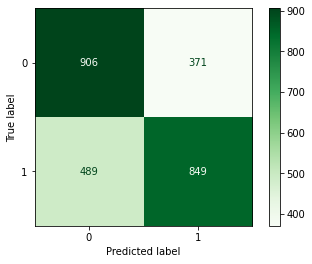


               precision    recall  f1-score   support

           0       0.65      0.71      0.68      1277
           1       0.70      0.63      0.66      1338

    accuracy                           0.67      2615
   macro avg       0.67      0.67      0.67      2615
weighted avg       0.67      0.67      0.67      2615



In [ ]:
#plotting confusion matrix and displaying classification results
cm=confusion_matrix(ytest_class, ypred)
cmd=ConfusionMatrixDisplay(cm)
cmd.plot(cmap="Greens")
print("Confusion Matrix of Logistic regression model :-\n")
plt.show()
print("\n",classification_report(ytest_class, ypred))

### **2. Support Vector Machine**

In [ ]:
#importing Support vector machine model
from sklearn.svm import SVC
#checking the best values for the required parameters
svc = SVC(random_state=0, probability=True)
params = {
    'C': [10, 100, 1000, 10000],
    'gamma': [1e-4, 0.001, 0.01, 0.1, 1, 10]
}
best_parameter(svc, params, Xtrain, ytrain_class)

Best parameters were {'C': 10000, 'gamma': '0.01'} 


In [ ]:
#initilasing the model with the aquired best parameters and fitting the training data to it
svc = SVC(random_state=0, probability=True, C=10000, gamma=0.01)
svc.fit(Xtrain, ytrain_class)
#predicitng improvement
ypred = svc.predict(Xtest)
#Calculating accuracy score of the model to check the performance of the model
svc_score=accuracy_score(ytest_class, ypred)
print('Accuracy of test set was',svc_score)

Accuracy of test set was 0.6680688336520076


Confusion Matrix of SVM classifier model :-



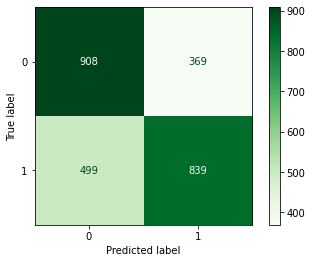


               precision    recall  f1-score   support

           0       0.65      0.71      0.68      1277
           1       0.69      0.63      0.66      1338

    accuracy                           0.67      2615
   macro avg       0.67      0.67      0.67      2615
weighted avg       0.67      0.67      0.67      2615



In [ ]:
#plotting confusion matrix and displaying classification results
cm=confusion_matrix(ytest_class, ypred)
cmd=ConfusionMatrixDisplay(cm)
cmd.plot(cmap="Greens")
print("Confusion Matrix of SVM classifier model :-\n")
plt.show()
print("\n",classification_report(ytest_class, ypred))

### **3. Random Forest Classifier**

In [ ]:
#importing Random forest classifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
params = {
    'n_estimators': [101, 201, 401, 601, 801, 1001],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 10, 20],
}
#checking the best values for the required parameters
best_parameter(rf, params, Xtrain, ytrain_class)

Best parameters were {'n_estimators': 1001, 'max_depth': 10,'min_samples_split': 10} 


In [ ]:
#initilasing the model with the aquired best parameters and fitting the training data to it
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1001, max_depth=10, min_samples_split=10,random_state=0)
rf.fit(Xtrain, ytrain_class)
#predicitng improvement
ypred = rf.predict(Xtest)
#Calculating accuracy score of the model to check the performance of the model
rf_score=accuracy_score(ytest_class, ypred)
print('Accuracy of test set was',rf_score)

Accuracy of test set was 0.6684512428298279


Confusion Matrix of Random forest model :-



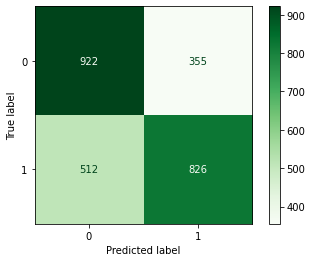


               precision    recall  f1-score   support

           0       0.64      0.72      0.68      1277
           1       0.70      0.62      0.66      1338

    accuracy                           0.67      2615
   macro avg       0.67      0.67      0.67      2615
weighted avg       0.67      0.67      0.67      2615



In [ ]:
#plotting confusion matrix and displaying classification results
cm=confusion_matrix(ytest_class, ypred)
cmd=ConfusionMatrixDisplay(cm)
cmd.plot(cmap="Greens")
print("Confusion Matrix of Random forest model :-\n")
plt.show()
print("\n",classification_report(ytest_class, ypred))

### **4. Gradient boost classifier**

In [ ]:
#importing Gradient boost classifier model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(
                    min_samples_split=2, max_depth=10,
                    max_features='sqrt', random_state=0)
params = {
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
    'n_estimators': [25, 51, 101, 201, 401, 601, 1001],
}
#checking the best values for the required parameters
best_parameter(gb, params, Xtrain, ytrain_class)

Best parameters were {'learning_rate': 0.005, 'n_estimators': 401


In [ ]:
#initilasing the model with the aquired best parameters and fitting the training data to it
gb=GradientBoostingClassifier(min_samples_split=2, max_depth=10,
                    max_features='sqrt', random_state=0,learning_rate= 0.005, n_estimators=401)
gb.fit(Xtrain,ytrain_class)
#predicitng improvement
ypred=gb.predict(Xtest)
#Calculating accuracy score of the model to check the performance of the model
gb_score=accuracy_score(ytest_class, ypred)
print('Accuracy of test set was',gb_score)

Accuracy of test set was 0.6638623326959847


Confusion Matrix of Gradient boosting classifier model :-



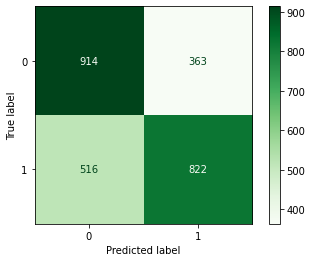


               precision    recall  f1-score   support

           0       0.64      0.72      0.68      1277
           1       0.69      0.61      0.65      1338

    accuracy                           0.66      2615
   macro avg       0.67      0.67      0.66      2615
weighted avg       0.67      0.66      0.66      2615



In [ ]:
#plotting confusion matrix and displaying classification results
cm=confusion_matrix(ytest_class, ypred)
cmd=ConfusionMatrixDisplay(cm)
cmd.plot(cmap="Greens")
print("Confusion Matrix of Gradient boosting classifier model :-\n")
plt.show()
print("\n",classification_report(ytest_class, ypred))

### ***Comparing accuracies of classification models***

In [ ]:
#creating a dataframe to display each model's accuracy
pd.DataFrame({"Logistic Regression":log_reg_score,"SVM Classifier":svc_score,"Random forest":rf_score,"Gradient boost Classifier":gb_score},index=["Accuracy"])

,Logistic Regression,SVM Classifier,Random forest,Gradient boost Classifier
Accuracy,0.671128,0.668069,0.668451,0.663862


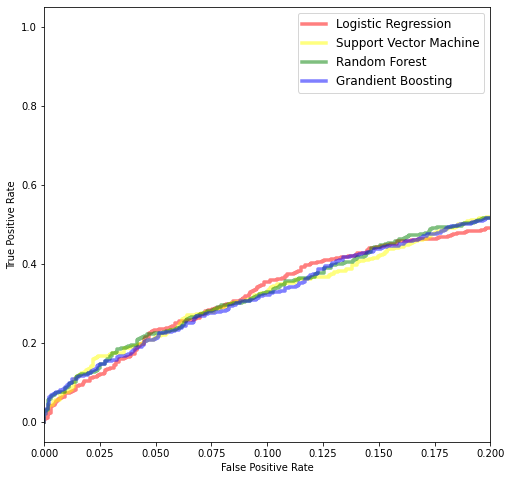

In [ ]:
from sklearn.metrics import roc_curve
models = [log_reg, svc, rf, gb]
labels = ['Logistic Regression', 'Support Vector Machine',
          'Random Forest', 'Grandient Boosting']
colors = ['red', 'yellow', 'green', 'blue']
plt.figure(figsize=(8,8))
for index, model in enumerate(models):
    ypred_prob = model.predict_proba(Xtest)[:,1]
    fpr, tpr, _ = roc_curve(ytest_class, ypred_prob)
    _ = plt.step(fpr, tpr, color=colors[index], alpha=0.5, where='post', label=labels[index],linewidth=3.5)
plt.xlim([0, 0.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(fontsize=12)